<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large">Métodos Avanzados en Aprendizaje Automático</div><br>
    <div style="font-size: x-large; color:gray">Introduction of Non-Linear Models</div><br>
    <div style="font-size: large">Carlos María Alaíz Gudín - Universidad Autónoma de Madrid</div><br></div><hr>
</div>

**Initial Configuration**

This cell defines the configuration of Jupyter Notebooks.

In [7]:
%%html
<style>
    .qst {background-color: #b1cee3; padding:10px; border-radius: 5px; border: solid 2px #5D8AA8;}
    .qst:before {font-weight: bold; content:"Exercise"; display: block; margin: 0px 10px 10px 10px;}
    h1, h2, h3 {color: #5D8AA8;}
</style>

In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


This cell imports the packages to be used (all of them quite standard except for `Utils`, which is provided with the notebook).

In [9]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import make_regression

from Utils import plot_dataset, plot_dataset_clas, plot_linear_model, plot_linear_model_clas
from Utils import plot_nonlinear_model, plot_nonlinear_model_clas, plot_krr_coefficients
from Utils import polynomial_basis, gaussian_basis, sigmoidal_basis

matplotlib.rc('figure', figsize=(15, 5))
seed = 123

# Limitation of Linear Models: Regression

## Dataset

The cell below defines a 1-dimensional non-linear regression dataset.

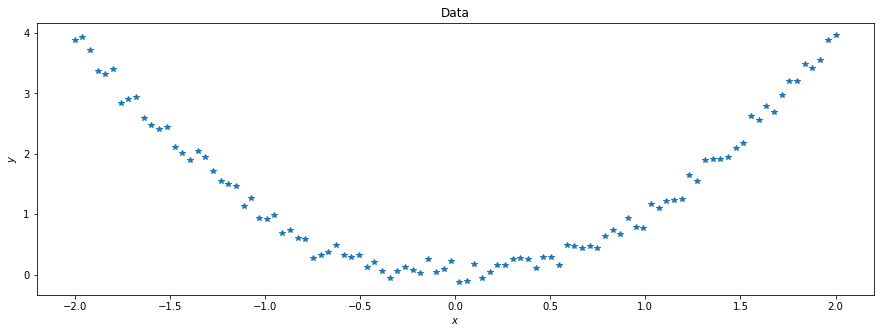

In [10]:
n_pat = 100
noise = 0.1

np.random.seed(seed)

x_r = np.linspace(-2, 2, n_pat)
y_r = np.square(x_r) + noise * np.random.randn(n_pat)

plot_dataset(x_r, y_r)

<div class="qst">

* Is it possible to tell in advance that it is non-linear using the plot?

</div>

## Manual Estimation

Try to define an accurate linear model over this dataset.

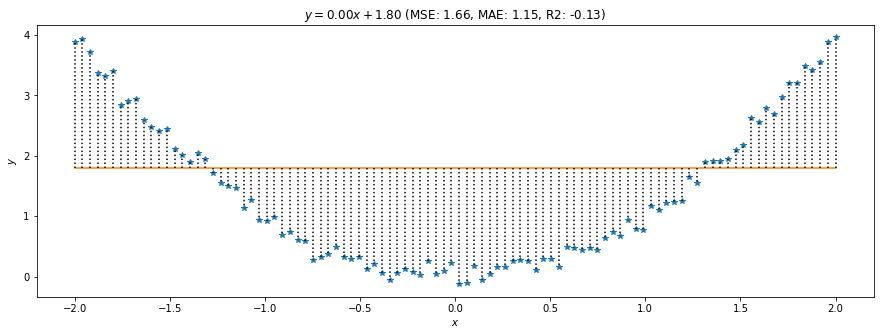

In [11]:
########################################
# The parameters of the linear model can be modified here.
w = 0
b = 1.8
########################################
plot_linear_model(x_r, y_r, w, b)

<div class="qst">

* Is it possible to fit a sensible linear model?

</div>

## Automatic Estimation

The cell below trains a linear model over the previous dataset.

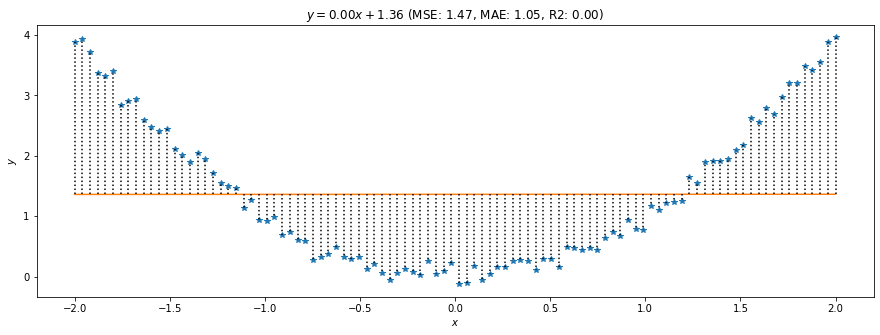

In [12]:
model = LinearRegression()
model.fit(x_r.reshape(-1, 1), y_r)
plot_linear_model(x_r, y_r, model.coef_[0], model.intercept_)

<div class="qst">

* How does the previous model perform?

</div>

# Limitation of Linear Models: Classification

## Dataset

The cell below defines a 2-dimensional non-linear classification dataset.

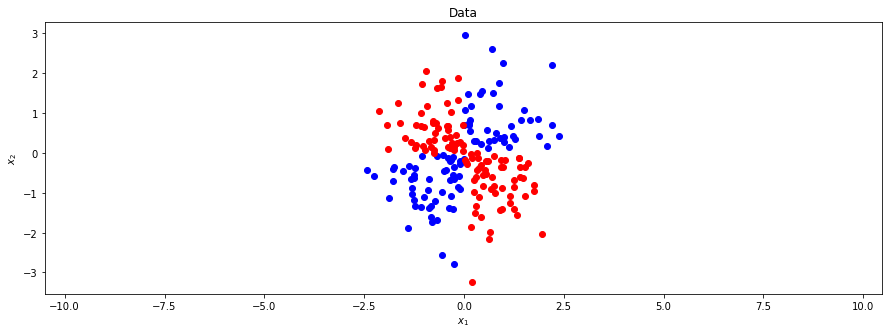

In [13]:
n_pat = 200
noise = 0.1

np.random.seed(seed)

x_c = np.random.randn(n_pat, 2)
y_c = np.ones(n_pat)
y_c = np.sign(x_c[:, 0] * x_c[:, 1])

plot_dataset_clas(x_c, y_c)

<div class="qst">

* Is it possible to tell in advance that it is non-linear using the plot?

</div>

## Manual Estimation

Try to define an accurate linear model over this dataset.

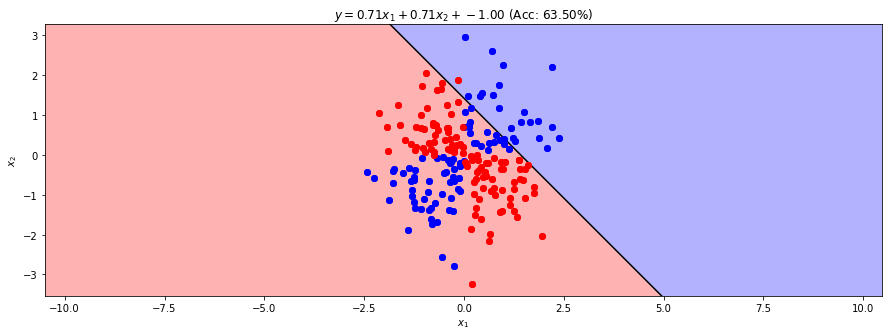

In [14]:
########################################
# The parameters of the linear model can be modified here.
deg = 45
b = -1.0

########################################

angle = deg / 360.0 * 2 * np.pi
plot_linear_model_clas(x_c, y_c, [np.sin(angle), np.cos(angle)], b)

<div class="qst">

* Is it possible to fit a sensible linear model?

</div>

## Automatic Estimation

The cell below trains a linear model over the previous dataset.

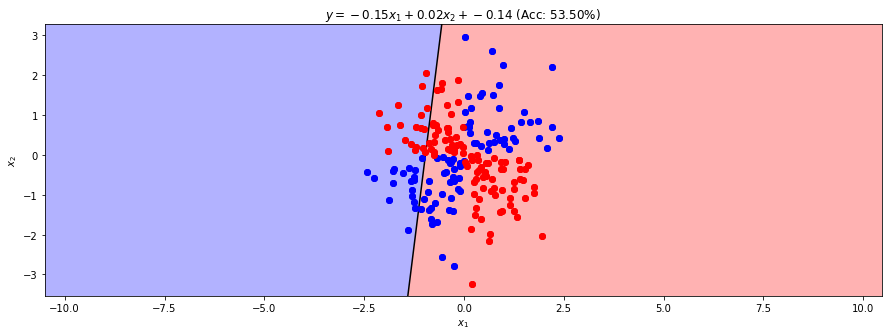

In [15]:
model = LogisticRegression(solver='lbfgs')
model.fit(x_c, y_c)
plot_linear_model_clas(x_c, y_c, model.coef_[0], model.intercept_)

<div class="qst">

* How does the previous model perform?
* Does the resultant model look sensible?

</div>

# Limitation of Linear Models: Not Always Trivial

The cell below determines the characteristics of the datasets.

In [16]:
n_samples=30
n_features=5

## Linear Dataset

This code defines a multidimensional regression dataset.

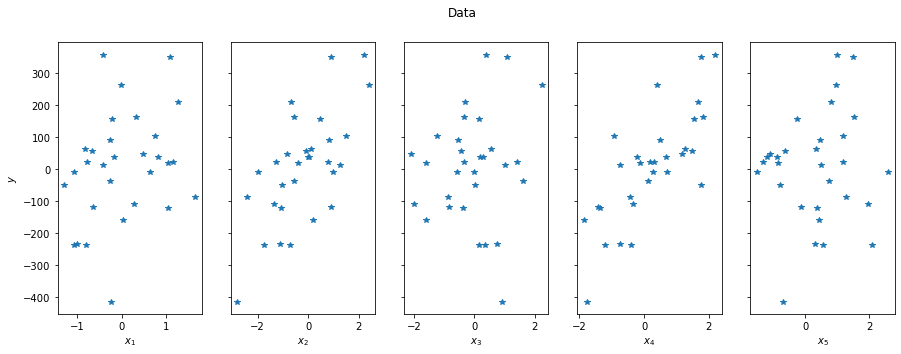

In [17]:
x_rl, y_rl = make_regression(n_samples=n_samples, \
                             n_features=n_features, \
                             n_informative=n_features, \
                             random_state=seed)

plot_dataset(x_rl, y_rl)

<div class="qst">

* Is it linear?
* Can this be deduced from the plots?

</div>

This code trains a linear model.

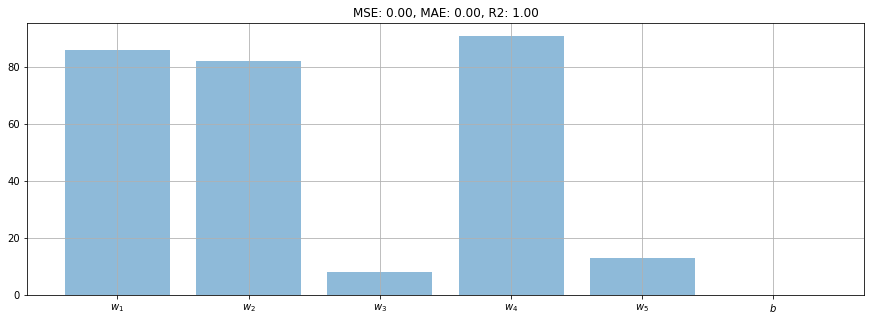

In [18]:
model = LinearRegression()
model.fit(x_rl, y_rl)
plot_linear_model(x_rl, y_rl, model.coef_, model.intercept_)

<div class="qst">

* How does it perform?
* Using the performance, is it more easy to tell if the dataset is linear?

</div>

## Non-Linear Dataset

This code defines a multidimensional regression dataset.

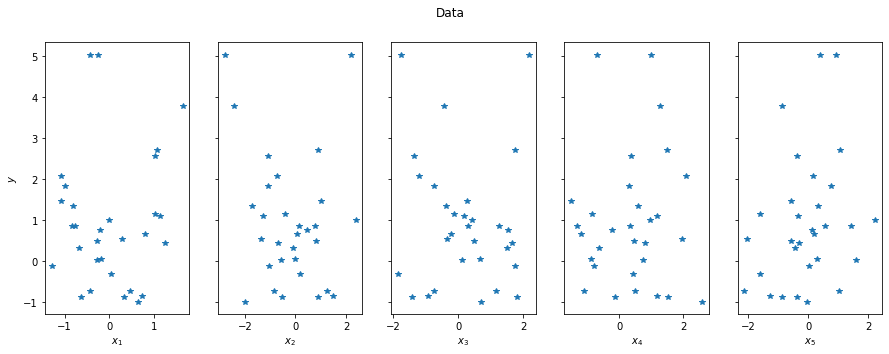

In [19]:
np.random.seed(seed)

x_rnl = np.random.randn(n_samples, n_features)
y_rnl = x_rnl[:, 0]**2 + x_rnl[:, 1] * x_rnl[:, 2]

plot_dataset(x_rnl, y_rnl)

<div class="qst">

* Is it linear?
* Can this be deduced from the plots?

</div>

This code trains a linear model.

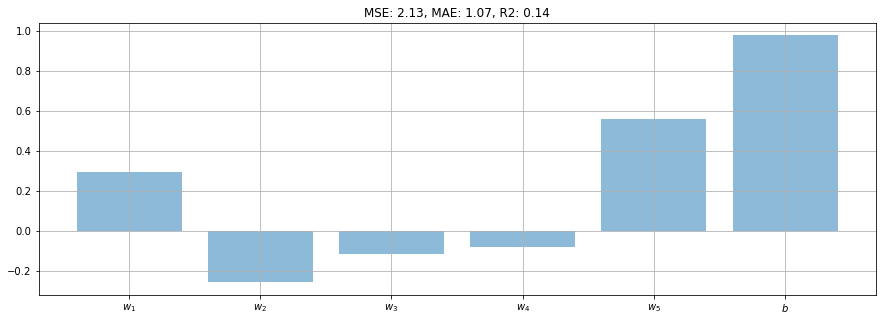

In [20]:
model = LinearRegression()
model.fit(x_rnl, y_rnl)
plot_linear_model(x_rnl, y_rnl, model.coef_, model.intercept_)

<div class="qst">

* How does it perform?
* Using the performance, is it more easy to tell if the dataset is linear?

</div>

# Generalized Linear Models - Feature Construction

## Regression

With the code below, the original input can be transformed into a new feature to build a Generalized Linear Model for the regression problem.

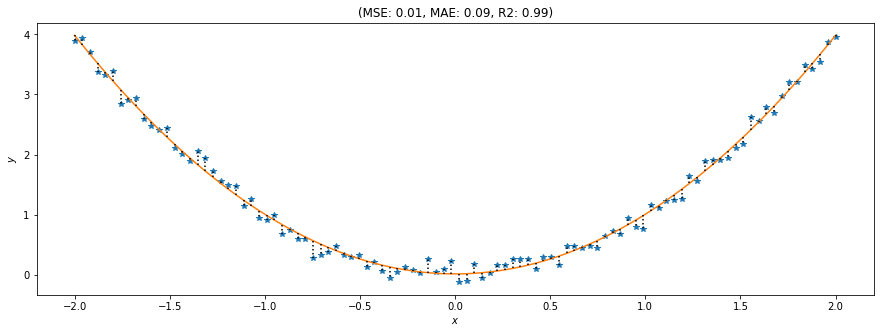

In [21]:
def phi(x):
    ########################################
    # A new synthetic feature can be defined here, by default it does not transform the input.
    x_n = x**2
    ########################################
    return x_n.reshape(x.shape[0], -1)

model = LinearRegression()
model.fit(phi(x_r), y_r)
plot_nonlinear_model(x_r, y_r, model, phi)

<div class="qst">

* Try with different mappings, like $\phi(x) = x$, $\phi(x) = x^2$, and $\phi(x) = x^3$.
* Which one works best?

</div>

## Classification

With the code below, the original inputs can be transformed into new features to build a Generalized Linear Model for the classification problem.

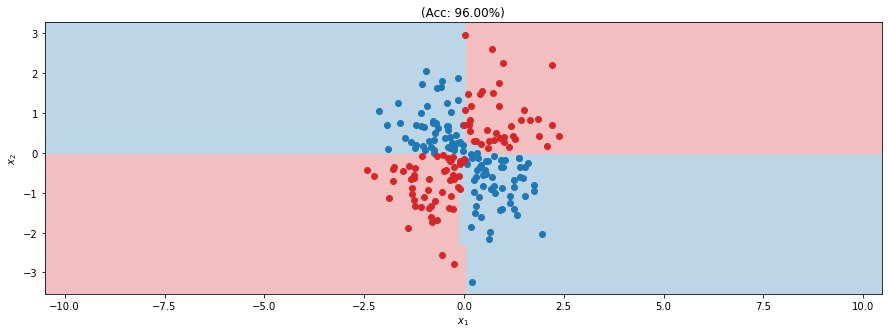

In [22]:
def phi(x):
    ########################################
    # A new synthetic feature can be defined here, by default it does not transform the input.
    x_n = x[:,0]*x[:,1]
    ########################################
    return x_n.reshape(x.shape[0], -1)

model = LogisticRegression(solver='lbfgs')
model.fit(phi(x_c), y_c)
plot_nonlinear_model_clas(x_c, y_c, model, phi)

<div class="qst">

* Try with different mappings, like $\boldsymbol{\phi}(\mathbf{x}) = \mathbf{x}$, $\boldsymbol{\phi}(x) = (x_1^2, x_2^2)$, $\boldsymbol{\phi}(\mathbf{x}) = (x_1 + x_2)^2$, and $\boldsymbol{\phi}(x) = x_1 x_2$.
* Which one works best?

</div>

# Generalized Linear Models - Sets of Basis Functions

## Dataset

This cell defines a new one-dimensional regression dataset, which is again non-linear.

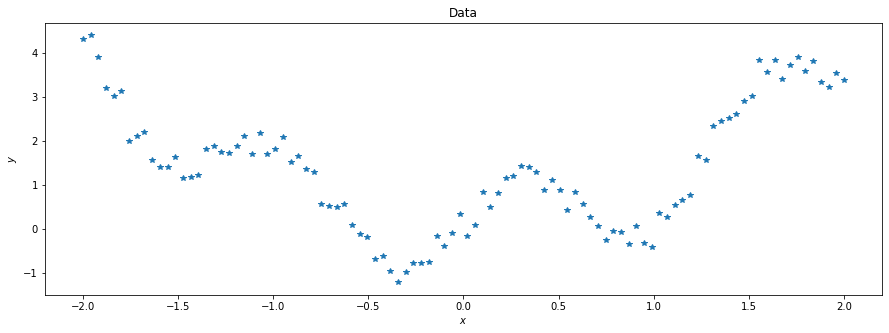

In [23]:
n_pat = 100
noise = 0.2

np.random.seed(seed)

x_r = np.linspace(-2, 2, n_pat)
y_r = np.square(x_r) + np.sin(5 * x_r) + noise * np.random.randn(n_pat)

plot_dataset(x_r, y_r)

<div class="qst">

* Is it easy to define now by hand an additional feature to make the problem affordable? Why?

</div>

## Polynomial Basis

The cell below expands the dataset using a polynomial basis. The degree $M$ is determined by the variable `deg`.

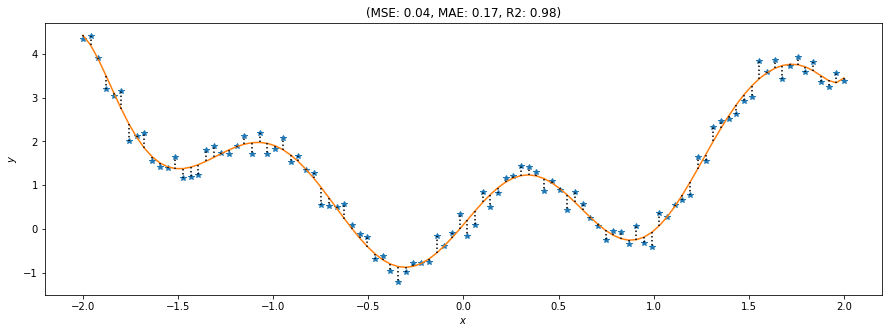

In [24]:
deg = 15
def phi(x):
    return polynomial_basis(x, deg)

model = LinearRegression()
model.fit(phi(x_r), y_r)
plot_nonlinear_model(x_r, y_r, model, phi)

<div class="qst">

* Try different values for the degree, like $M = 1$, $M = 5$, $M = 10$ and $M = 40$.
* Which one works best?
* Can you appreciate any over-fitting or under-fitting, depending on the value of $M$?

</div>

## Guassian Basis

The cell below expands the dataset using a Gaussian basis. The number of Gaussians $D$ is determined by the variable `n_partitions`, the centres of the Gaussians are equispaced over all the interval, and their widths $\sigma_i$ are determined by the variable `sigma`.

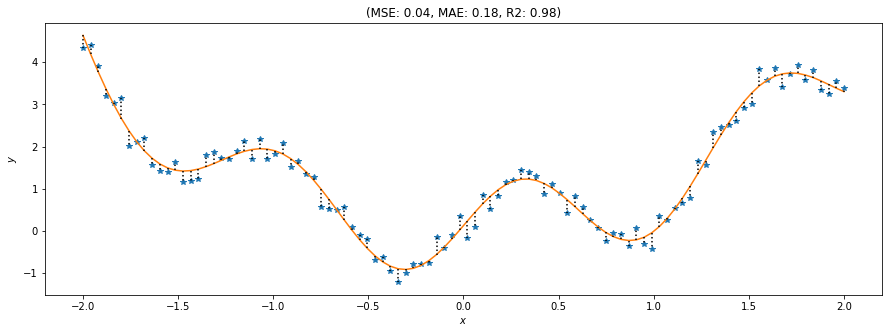

In [25]:
n_partitions = 10
sigma = 1
def phi(x):
    mu = np.linspace(-2, 2, n_partitions)
    return gaussian_basis(x, mu, sigma)

model = LinearRegression()
model.fit(phi(x_r), y_r)
plot_nonlinear_model(x_r, y_r, model, phi)

In [26]:
gaussian_basis([1,2,3], np.array([1,2,3]),1)

array([[1.        , 0.36787944, 0.01831564],
       [0.36787944, 1.        , 0.36787944],
       [0.01831564, 0.36787944, 1.        ]])

<div class="qst">

* Try different combinations of the number of functions and their width, like $(D = 2, \sigma = 1)$, $(D = 10, \sigma = 1)$ and $(D = 100, \sigma = 0.1)$.
* Which one works best?
* Can you appreciate any over-fitting or under-fitting, depending on the configuration of the basis?

</div>

## Sigmoidal Basis

The cell below expands the dataset using a sigmoidal basis. The number of sigmoids $D$ is determined by the variable `n_partitions`, the centres of the sigmoids are equispaced over all the interval, and their widths $a_i$ are determined by the variable `a`.

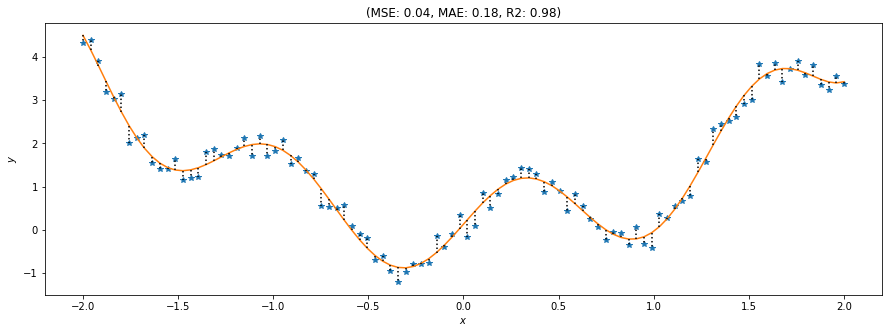

In [27]:
n_partitions = 10
a = 1
def phi(x):
    b = np.linspace(-2, 2, n_partitions)
    return sigmoidal_basis(x, a, b)

model = LinearRegression()
model.fit(phi(x_r), y_r)
plot_nonlinear_model(x_r, y_r, model, phi)

<div class="qst">

* Try different combinations of the number of functions and their width, like $(D = 2, a = 1)$, $(D = 10, a = 1)$ and $(D = 100, a = 0.1)$.
* Which one works best?
* Can you appreciate any over-fitting or under-fitting, depending on the configuration of the basis?

</div>

# Kernel Ridge Regression

## Ridge Regression vs. Kernel Ridge Regression

The following cells train a Ridge Regression model and a Kernel Ridge Regression model with linear kernel, printing the optimum primal coefficient $w$.

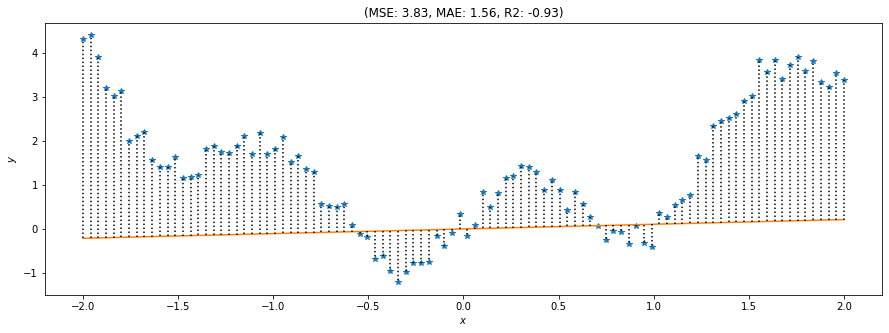

Coefficient: 0.1064


In [28]:
model = Ridge(fit_intercept=False)
model.fit(np.reshape(x_r, (-1, 1)), y_r)

plot_nonlinear_model(x_r, y_r, model)
plt.show()

w = model.coef_
print('Coefficient: %.4f' % w)

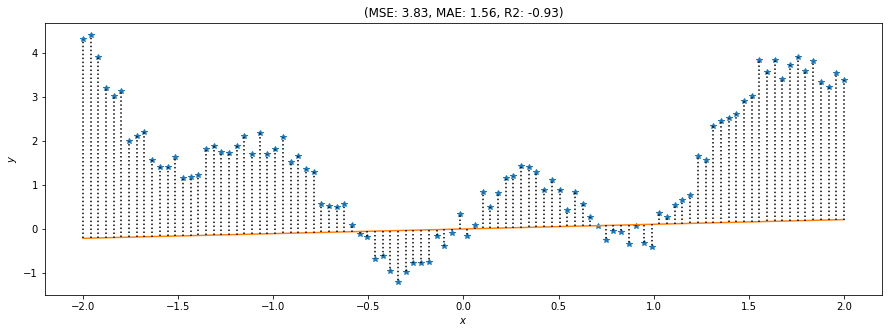

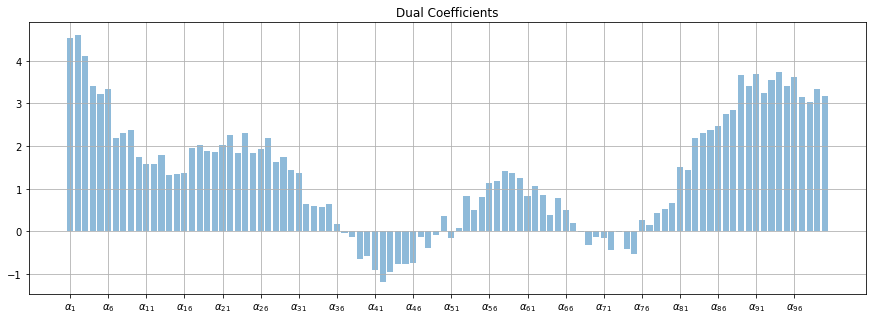

Primal Coefficient: 0.1064


In [29]:
model = KernelRidge(kernel='linear')
model.fit(np.reshape(x_r, (-1, 1)), y_r)

plot_nonlinear_model(x_r, y_r, model)
plt.show()

plot_krr_coefficients(model)
plt.show()

# dual_coef_ contains the values of alpha, and X_fit_ the training patterns.
w = (model.dual_coef_ @ model.X_fit_)[0]
print('Primal Coefficient: %.4f' % w)

<div class="qst">

* Are these two models equivalent?
* How is the hyper-plane recovered from the dual coefficients? Does it match the theory?

</div>

## Polynomial Kernel

A Kernel Ridge Regression model with polynomial kernel can be trained with the cell below.

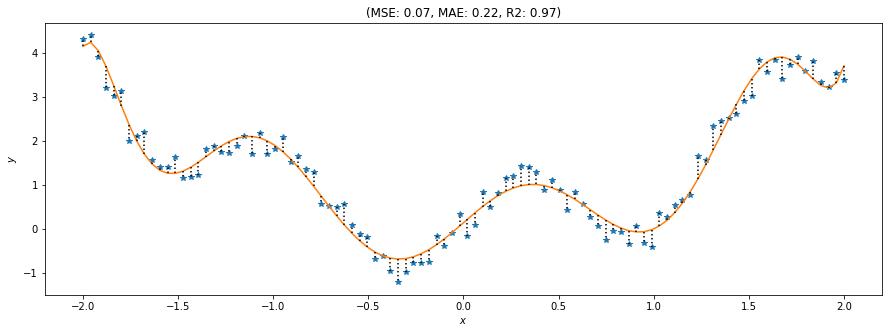

In [35]:
model = KernelRidge(kernel='polynomial', degree=10, alpha=1e-2)
model.fit(np.reshape(x_r, (-1, 1)), y_r)

plot_nonlinear_model(x_r, y_r, model)

<div class="qst">

* Try different values of the degree (variable `degree`), like $1$, $5$, $10$ and $30$.
* What is the influence of the degree?

</div>

## RBF Kernel

A Kernel Ridge Regression model with RBF kernel can be trained with the cell below.

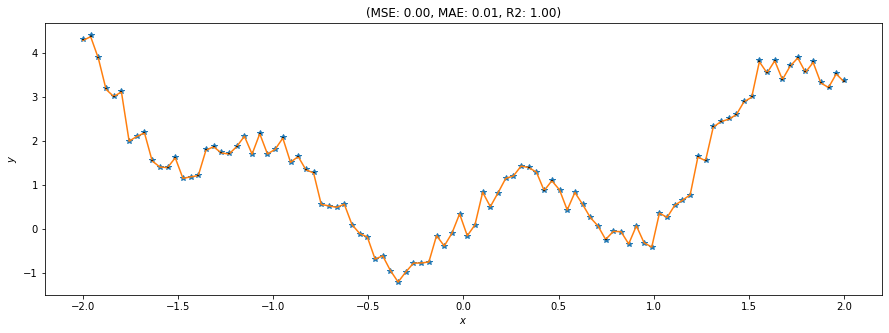

In [37]:
model = KernelRidge(kernel='rbf', gamma=1e3, alpha=1e-2)
model.fit(np.reshape(x_r, (-1, 1)), y_r)

plot_nonlinear_model(x_r, y_r, model)

<div class="qst">

* Try different values of the kernel parameter (variable `gamma`, the inverse of the Gaussian width), like $10^{-3}$, $10^{0}$, and like $10^{3}$.
* What is the influence of this parameter?

</div>